# Classification: Criteo

### Step 1- Import Model

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

from sklearn.metrics import log_loss, roc_auc_score


In [2]:
data = pd.read_csv('./criteo_sample.txt')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   200 non-null    int64  
 1   I1      110 non-null    float64
 2   I2      200 non-null    int64  
 3   I3      166 non-null    float64
 4   I4      165 non-null    float64
 5   I5      194 non-null    float64
 6   I6      149 non-null    float64
 7   I7      190 non-null    float64
 8   I8      200 non-null    float64
 9   I9      190 non-null    float64
 10  I10     110 non-null    float64
 11  I11     190 non-null    float64
 12  I12     43 non-null     float64
 13  I13     165 non-null    float64
 14  C1      200 non-null    object 
 15  C2      200 non-null    object 
 16  C3      191 non-null    object 
 17  C4      191 non-null    object 
 18  C5      200 non-null    object 
 19  C6      168 non-null    object 
 20  C7      200 non-null    object 
 21  C8      200 non-null    object 
 22  C9

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,NaN,3,260.0,NaN,17668.0,NaN,NaN,33.0,NaN,...,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN
1,0,NaN,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,...,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN
2,0,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,...,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN
3,0,NaN,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,...,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN
4,0,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de


In [3]:
data.label.value_counts()

0    151
1     49
Name: label, dtype: int64

In [4]:
print(data.columns)

Index(['label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')


In [5]:
# C1, C2, ..., C26
sparse_features = ['C' + str(i) for i in range(1, 27)]
# I1, I2, ..., I13
dense_features = ['I'+str(i) for i in range(1, 14)]

data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0,)
target = ['label']

In [6]:
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.0,3,260.0,0.0,17668.0,0.0,0.0,33.0,0.0,...,e5ba7672,87c6f83c,-1,-1,0429f84b,-1,3a171ecb,c0d61a5c,-1,-1
1,0,0.0,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,...,d4bb7bd8,6fc84bfb,-1,-1,5155d8a3,-1,be7c41b4,ded4aac9,-1,-1
2,0,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,...,e5ba7672,675c9258,-1,-1,2e01979f,-1,bcdee96c,6d5d1302,-1,-1
3,0,0.0,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,...,e5ba7672,52e44668,-1,-1,e587c466,-1,32c7478e,3b183c5c,-1,-1
4,0,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,-1,32c7478e,0d4a6d1a,001f3601,92c878de


### Step 2- Simple Preprocessing

In [7]:
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

In [8]:
nms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = nms.fit_transform(data[dense_features])

In [9]:
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.0,0.001332,0.092362,0.000000,0.034825,0.000000,0.000000,0.673469,0.000000,...,8,66,0,0,3,0,1,96,0,0
1,0,0.0,0.000000,0.006750,0.402299,0.059628,0.117284,0.003322,0.714286,0.154739,...,7,52,0,0,47,0,7,112,0,0
2,0,0.0,0.000333,0.000710,0.137931,0.003968,0.077873,0.019934,0.714286,0.505803,...,8,49,0,0,25,0,6,53,0,0
3,0,0.0,0.004664,0.000355,0.045977,0.033185,0.094967,0.016611,0.081633,0.028046,...,8,37,0,0,156,0,0,32,0,0
4,0,0.0,0.000333,0.036945,0.310345,0.003922,0.067426,0.013289,0.653061,0.035783,...,8,14,5,3,9,0,0,5,1,47


### Step 3 - Generate feature columns

- For sparse features, we transform them into dense vectors by embedding techniques. 
- For dense numerical features, we concatenate them to the input tensors of fully connected layer.

In [10]:
### Exploration
data[["C1", "I1"]].tail()

,C1,I1
195,0,0.000000
196,21,0.000000
197,0,0.027027
198,0,0.000000
199,21,0.027027


In [11]:
### Exploration
feat = "C1"
print(SparseFeat(feat, vocabulary_size=data[feat].max() + 1,embedding_dim=4))
feat = "I1"
print(DenseFeat(feat, 1))

SparseFeat(name='C1', vocabulary_size=27, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7de778185a90>, embedding_name='C1', group_name='default_group', trainable=True)
DenseFeat(name='I1', dimension=1, dtype='float32', transform_fn=None)


In [12]:
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].max() + 1,embedding_dim=4)
                       for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                      for feat in dense_features]

In [13]:
fixlen_feature_columns[0], fixlen_feature_columns[-1]

(SparseFeat(name='C1', vocabulary_size=27, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7de71bfa7050>, embedding_name='C1', group_name='default_group', trainable=True),
 DenseFeat(name='I13', dimension=1, dtype='float32', transform_fn=None))

In [14]:
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
feature_names[0], feature_names[-1], len(feature_names)

('C1', 'I13', 39)

### Step 4 - Generate the training samples and train the model

In [15]:
train, test = train_test_split(data, test_size=0.2)

In [16]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 181 to 80
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   160 non-null    int64  
 1   I1      160 non-null    float64
 2   I2      160 non-null    float64
 3   I3      160 non-null    float64
 4   I4      160 non-null    float64
 5   I5      160 non-null    float64
 6   I6      160 non-null    float64
 7   I7      160 non-null    float64
 8   I8      160 non-null    float64
 9   I9      160 non-null    float64
 10  I10     160 non-null    float64
 11  I11     160 non-null    float64
 12  I12     160 non-null    float64
 13  I13     160 non-null    float64
 14  C1      160 non-null    int64  
 15  C2      160 non-null    int64  
 16  C3      160 non-null    int64  
 17  C4      160 non-null    int64  
 18  C5      160 non-null    int64  
 19  C6      160 non-null    int64  
 20  C7      160 non-null    int64  
 21  C8      160 non-null    int64  
 22  C

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
181,1,0.108108,0.000000,0.002131,0.068966,0.001719,0.014720,0.122924,0.857143,0.323017,...,8,44,0,0,144,0,2,111,0,0
160,0,0.000000,0.000666,0.001421,0.022989,0.017117,0.005223,0.003322,0.061224,0.006770,...,7,7,36,2,135,3,1,103,1,38
82,0,0.000000,0.000000,0.000000,0.000000,0.000704,0.000000,0.000000,0.204082,0.010638,...,8,80,5,1,128,0,0,12,16,17
116,1,0.000000,0.000666,0.009591,0.436782,0.002955,0.034663,0.046512,0.714286,0.260155,...,8,52,0,0,45,0,2,112,0,0
79,1,0.000000,0.853098,0.000710,0.000000,0.125267,0.188984,0.000000,0.142857,0.117988,...,7,110,5,1,99,0,8,85,2,83


In [17]:
len(train["C1"].values), train["C1"].values

(160,
 array([16,  0, 11, 16, 18,  9,  0, 16, 15, 11,  0, 10, 18, 11, 10,  0,  9,
         0, 21,  0,  0,  0,  9,  0, 11, 11,  0,  0,  9, 18,  2, 11,  0,  6,
         0,  9, 11, 21,  0, 16,  0, 19,  0,  0, 10, 11,  0,  6, 11,  0,  0,
         0,  0,  0,  0,  0,  0,  9, 11, 16,  0,  0,  6, 11,  0, 12,  0,  9,
         0,  4, 18, 11,  0,  0,  9,  6, 23, 16,  0,  5, 11,  0, 11,  0, 11,
         0, 16,  0,  0, 21, 11, 11,  0, 16, 22,  0, 10, 21, 19,  0,  0,  0,
        11,  0,  0,  0,  0, 11, 21,  0, 11,  0, 10,  0, 11,  0,  0, 16, 11,
         0,  0, 11,  9,  7, 16,  0,  0, 21,  0,  0,  6, 25,  1, 11,  0,  0,
        11, 16, 11,  0, 11, 11,  0,  0,  6,  0, 16,  0, 16, 11, 14,  0, 17,
         0,  0,  0,  0,  0, 11,  0]))

In [18]:
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

In [19]:
train_model_input["C1"]

array([16,  0, 11, 16, 18,  9,  0, 16, 15, 11,  0, 10, 18, 11, 10,  0,  9,
        0, 21,  0,  0,  0,  9,  0, 11, 11,  0,  0,  9, 18,  2, 11,  0,  6,
        0,  9, 11, 21,  0, 16,  0, 19,  0,  0, 10, 11,  0,  6, 11,  0,  0,
        0,  0,  0,  0,  0,  0,  9, 11, 16,  0,  0,  6, 11,  0, 12,  0,  9,
        0,  4, 18, 11,  0,  0,  9,  6, 23, 16,  0,  5, 11,  0, 11,  0, 11,
        0, 16,  0,  0, 21, 11, 11,  0, 16, 22,  0, 10, 21, 19,  0,  0,  0,
       11,  0,  0,  0,  0, 11, 21,  0, 11,  0, 10,  0, 11,  0,  0, 16, 11,
        0,  0, 11,  9,  7, 16,  0,  0, 21,  0,  0,  6, 25,  1, 11,  0,  0,
       11, 16, 11,  0, 11, 11,  0,  0,  6,  0, 16,  0, 16, 11, 14,  0, 17,
        0,  0,  0,  0,  0, 11,  0])

In [20]:
# task param = "binary" for binary logloss
model = DeepFM(linear_feature_columns, dnn_feature_columns, task="binary")
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["binary_crossentropy"])

In [21]:
EPOCHS = 10
BATCH_SIZE = 256
history = model.fit(train_model_input, train[target].values, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=0.2)

Epoch 1/10
1/1 - 3s - loss: 0.7355 - binary_crossentropy: 0.7355 - val_loss: 0.7371 - val_binary_crossentropy: 0.7370
Epoch 2/10
1/1 - 0s - loss: 0.7108 - binary_crossentropy: 0.7107 - val_loss: 0.7241 - val_binary_crossentropy: 0.7241
Epoch 3/10
1/1 - 0s - loss: 0.6884 - binary_crossentropy: 0.6884 - val_loss: 0.7120 - val_binary_crossentropy: 0.7119
Epoch 4/10
1/1 - 0s - loss: 0.6674 - binary_crossentropy: 0.6674 - val_loss: 0.6996 - val_binary_crossentropy: 0.6995
Epoch 5/10
1/1 - 0s - loss: 0.6467 - binary_crossentropy: 0.6467 - val_loss: 0.6871 - val_binary_crossentropy: 0.6870
Epoch 6/10
1/1 - 0s - loss: 0.6258 - binary_crossentropy: 0.6258 - val_loss: 0.6743 - val_binary_crossentropy: 0.6743
Epoch 7/10
1/1 - 0s - loss: 0.6048 - binary_crossentropy: 0.6048 - val_loss: 0.6615 - val_binary_crossentropy: 0.6615
Epoch 8/10
1/1 - 0s - loss: 0.5839 - binary_crossentropy: 0.5838 - val_loss: 0.6488 - val_binary_crossentropy: 0.6488
Epoch 9/10
1/1 - 0s - loss: 0.5630 - binary_crossentropy

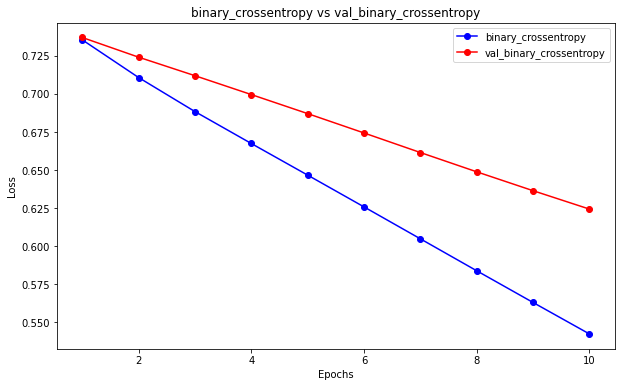

In [22]:
# Extract loss and validation loss values
def plot_history(history, train_metric: str, val_metric: str):
    history_dict = history.history

    loss = history_dict[train_metric]
    val_loss = history_dict[val_metric]
    # Create an array with epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label=train_metric)
    plt.plot(epochs, val_loss, 'ro-', label=val_metric)
    plt.title(f'{train_metric} vs {val_metric}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history, "binary_crossentropy", "val_binary_crossentropy")

In [23]:
pred_ans = model.predict(test_model_input, batch_size=32)

In [25]:
print("test LogLoss", round(log_loss(test[target].values, pred_ans), 4))
print("test AUC", round(roc_auc_score(test[target].values, pred_ans), 4))

test LogLoss 0.6305
test AUC 0.4375


In [84]:
pred_ans.shape

(40, 1)

In [98]:
test.label.values, test.label.values.shape 

(array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]),
 (40,))

In [97]:
pred_ans.reshape(-1).shape

(40,)

In [95]:
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy

In [96]:
true_labels_tf = tf.convert_to_tensor(test.label.values, dtype=tf.float32)
predicted_probabilities_tf = tf.convert_to_tensor(pred_ans.reshape(-1), dtype=tf.float32)

bce_loss = binary_crossentropy(true_labels_tf, predicted_probabilities_tf)
mean_bce_loss = tf.reduce_mean(bce_loss)
print("Binary Cross-Entropy Loss:", mean_bce_loss.numpy())


Binary Cross-Entropy Loss: 0.5917163
